<a href="https://colab.research.google.com/github/BintiKadzo/DSC14_Wk9_KNN_Naive_Bayes_Classification/blob/main/Moringa_Data_Science_Core_W9_Independent_Project_2022_05_(KNN)_Matilda_Kadzo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K - NEAREST NEIGHBORS (KNN) 


## 1. Defining the Question
Perform classification on the Titanic Dataset using the K-Nearest Negithbors.

### a.) Specifying the Question
Create a model, using Machine Learning to predict whether a passenger survives or not.

### b.) Defining the Metric for Success
Achieving an accuracy level of at least 70%. Lowest false negatives and false positives achieved by the confusion matrix

### c.) Recording the Experimental Design
*   Specify the question
*   Find the outliers present and deal with them, as well as all anomalies i.e missing data and duplicates.
* Perform Exploratory Data Analysis (EDA) on the dataset i.e Univariate and Bivariate Analysis.
* Using K-Nearest Neighbors build a classification model to analyse the survival chances of a passenger ( whether they survive or not)
* Draw a conclusion and male necessary recommendations.

### d.) Data Relevance
The dataset provided was relevant for our study.



## 2. Reading the data

In [1]:
# Importing all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# Loading our dataset

training_df = pd.read_csv('train.csv')
training_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Checking the Data

In [3]:
# Display the top entries of our dataset

training_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Display the bottom entries of our dataset

training_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# Checking our dataset's shape

training_df.shape

(891, 12)

In [6]:
# Checking the respective datatypes of the present columns

training_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Cleaning the Dataset

In [7]:
# Checking the dataset for duplicates

training_df.duplicated().value_counts()

False    891
dtype: int64

There are no duplicates present in the dataset

In [8]:
# Checking for missing values in the data

training_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Columns with missing values are: Age, Cabin, Embarked

In [9]:
# The Cabin column has almost all values missing and therefore it'll be dropped

training_df.drop(columns = 'Cabin', inplace = True)

In [10]:
# The embarked coumn has 2 missing values and these will be dropped as a result

training_df.dropna(inplace = True)

In [11]:
# For the age column, the missing values will be filled by the mean of the age column

training_df['Age'].fillna(training_df['Age'].mean(), inplace = True)

In [12]:
# Checking for missing values after handling the missing values

training_df.isnull().sum().sum()

0

In [13]:
# For uniformity, the column names will be changed to lowercase

training_df.columns = map(str.lower,training_df.columns)
training_df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

In [14]:
# For our analysis, unnecessary columns will be dropped
training_df.drop(columns = ['passengerid','name','ticket','fare'], inplace = True)
training_df.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [15]:
# Checking for unique values in the embarked column

training_df['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

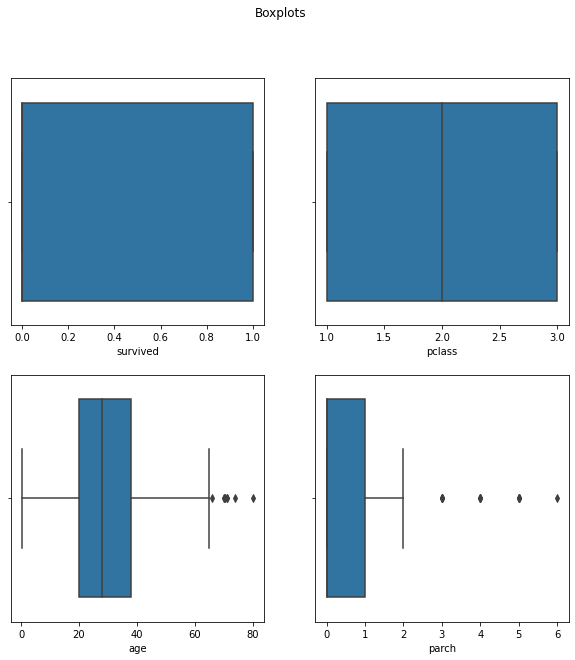

In [16]:
# Using boxplots, i'll check the dataset for outliers

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 10))
fig.suptitle('Boxplots')
sns.boxplot(training_df['survived'], ax=ax1)
sns.boxplot(training_df['pclass'], ax=ax2)
sns.boxplot(training_df['age'], ax=ax3)
sns.boxplot(training_df['parch'], ax=ax4)
plt.show()


## 5. Exploratory Data Analysis (EDA)

a.) Univariate Analysis

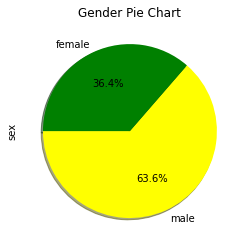

In [17]:
# Gender Pie Chart
colors = ['yellow', 'green']
training_df['sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors, 
                                               shadow = True, startangle = 180)
plt.title('Gender Pie Chart')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


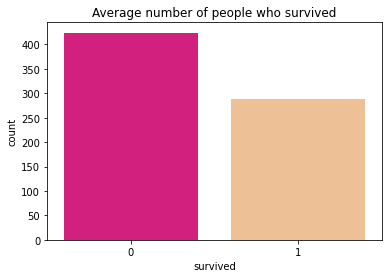

In [18]:
# Plotting a count plot for the survivors column

sns.countplot(training_df['survived'], palette ='Accent_r')
plt.title('Average number of people who survived')
plt.show()

Measure of Central Tendancy

In [19]:
# Mean

print('The average age is:', int(training_df['age'].mean()))

The average age is: 29


In [20]:
# Mode

print('The average age is:', int(training_df['age'].mode()[0]))

The average age is: 24


In [21]:
# Median

print('The average age is:', int(training_df['age'].median()))

The average age is: 28


b.) Bivariate Analysis

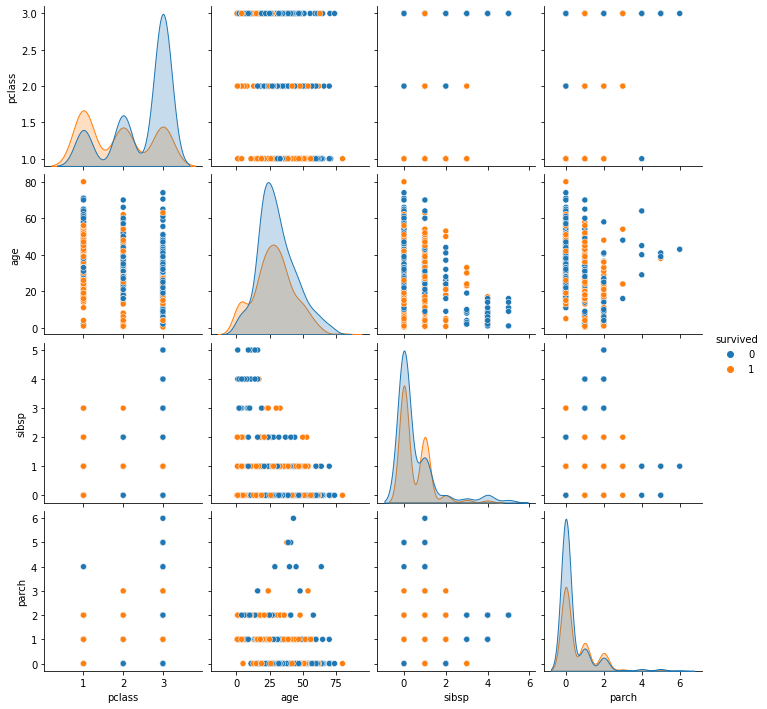

In [22]:
# Plot pairplot

sns.pairplot(training_df, hue = 'survived')
plt.show()

In [23]:
# Checkign the dataset's correlation matrix

training_df.corr()

,survived,pclass,age,sibsp,parch
survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265
pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666
age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896
sibsp,-0.015523,0.065187,-0.307351,1.000000,0.383338
parch,0.095265,0.023666,-0.187896,0.383338,1.000000


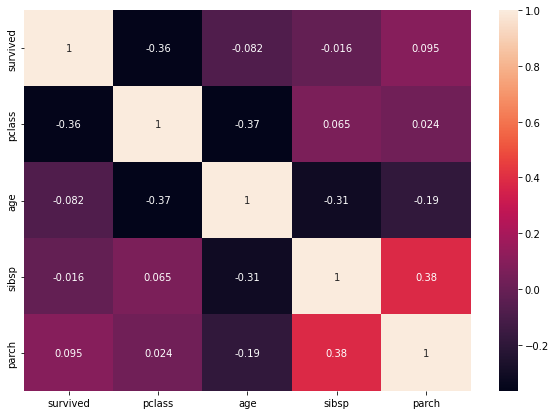

In [24]:
# Plotting a heatmap to visualize the correlation

plt.figure(figsize = (10,7))
sns.heatmap(training_df.corr(),annot= True)
plt.show()

From the heatmap above, there is no strong correlation between any of the variables. They all display weak correlations.

## 6. Implementing the Solution

To implement the solution, we will employ the KNN algorithm, then check the accuracy of our model hoping for a 70+% accuracy level



In [25]:
# To transform categorical features to numerical features we will LabelEncode our data.

le = LabelEncoder()
training_df['sex'] = le.fit_transform(training_df['sex'])
training_df['embarked'] = le.fit_transform(training_df['embarked'])

In [26]:
# Defining and labeling and our attributes

X = training_df.drop('survived', axis = 1)
y = training_df['survived'].values

In [27]:
# Performing a train_test split
# First off, we'll used an 80-20 split

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.20, random_state = 0)

In [28]:
# Previewing out data
training_df.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


In [29]:
# Checking unique values in our columns

training_df.nunique()

survived     2
pclass       3
sex          2
age         88
sibsp        6
parch        7
embarked     3
dtype: int64

In [30]:
# Scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
# Make predictions for our test data

y_pred = classifier.predict(X_test)

In [33]:
# Evaluating the algorithm
# We'll use confusion matrix, precision, recall and f1 score metrics to evaluate the algorithm

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[67 15]
 [19 42]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        82
           1       0.74      0.69      0.71        61

    accuracy                           0.76       143
   macro avg       0.76      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143

0.7622377622377622


From the algorithm, we get an accuracy score 76.22% using the 80-20 split and a k-value of 2

Now let's use 70-30 split and see how our model performs.

In [34]:
# Let's split our data into train and test dataset : 70-30 split

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state = 0)

In [35]:
# Create and fit the model

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
# Model prediction

y_pred = classifier.predict(X_test)

In [37]:
# Evaluate the algorithm

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[104  21]
 [ 35  54]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       125
           1       0.72      0.61      0.66        89

    accuracy                           0.74       214
   macro avg       0.73      0.72      0.72       214
weighted avg       0.74      0.74      0.73       214

0.7383177570093458


From the algorithm, we get an accuracy score 73.83% using the 70-30 split and a k-value of 2

Let's use 60-40 split and see how our model performs.



In [38]:
# Let's split our data into train and test dataset : 60-40 split

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.40, random_state = 0)

In [39]:
# Create and fit the model

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
# Model prediction

y_pred = classifier.predict(X_test)

In [41]:
# Evaluate the algorithm

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[143  26]
 [ 49  67]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       169
           1       0.72      0.58      0.64       116

    accuracy                           0.74       285
   macro avg       0.73      0.71      0.72       285
weighted avg       0.73      0.74      0.73       285

0.7368421052631579


With a 60-40 split, the model has a 73.68% accuracy

---
We, therefore achieve the highest accuracy with the 80-20 split at 76.22%


## 8. Challenging the Solution

In [43]:
# By attempting to improve the model performance, we challenge this solution

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.20, random_state = 0)


In [44]:
# Improving the model using a feature reduction technique algorithm

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


In [45]:
# Fitting the model

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
# Let's check for the best parameters

from sklearn.model_selection import GridSearchCV
 
parameters = [{'n_neighbors': [1,2,3,4,5,6,7,8,9,10], 'weights': ['uniform'], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 'metric':['minkowski', 'euclidean', 'manhattan', 'chebyshev']},
              {'n_neighbors': [1,2,3,4,5,6,7,8,9,10], 'weights': ['distance'], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 'metric':['minkowski', 'euclidean', 'manhattan', 'chebyshev']}]

# The n_jobs is to set all your process to run the grid search

grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy',
                           cv = 10, n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)


Best Accuracy: 81.20 %
Best Parameters: {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 2, 'weights': 'uniform'}


An accuracy level of 81.20% was obtained after  checking for best parameters, which, out of all splits, is the highest percentage so far.

## 9.Follow Up Questions
### a.)Did we have the right Data?
Yes we did have the right data

### b.)Do we need other data to answer our question?
No, the data was sufficient.

### c.)Did we have the right question?
Yes we did.